### Importing and reading the dataset

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Data.txt')
data.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft


### Checking and treating NULL Values

In [3]:
data.isnull().sum()

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    1
Top24    3
Top25    3
dtype: int64

In [4]:
data = data.dropna(axis=0)
data.isnull().sum()

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    0
Top24    0
Top25    0
dtype: int64

### Splitting the dataset without disturbing the sequence

In [5]:
train = data[data['Date'] < '20150101']
test = data[data['Date'] > '20141231']

In [6]:
headline_train =  train.iloc[:, 2:]
label_train    =  train['Label']
headline_test  =  test.iloc[:, 2:]
label_test     =  test['Label']

### Checking for Imbalance

In [7]:
print(label_train.value_counts())
print(label_test.value_counts())

1    2093
0    1879
Name: Label, dtype: int64
1    192
0    186
Name: Label, dtype: int64


In [8]:
## there is NO significant imbalance in the dataset

### Joining all the headlines into a single paragraph

In [9]:
headline_4_train = []

for row in range(len(headline_train.index)):
    headline_4_train.append(" ".join(str(x) for x in headline_train.iloc[row,:]))
    
headline_4_train[0]

"A 'hindrance to operations': extracts from the leaked reports Scorecard Hughes' instant hit buoys Blues Jack gets his skates on at ice-cold Alex Chaos as Maracana builds up for United Depleted Leicester prevail as Elliott spoils Everton's party Hungry Spurs sense rich pickings Gunners so wide of an easy target Derby raise a glass to Strupar's debut double Southgate strikes, Leeds pay the penalty Hammers hand Robson a youthful lesson Saints party like it's 1999 Wear wolves have turned into lambs Stump mike catches testy Gough's taunt Langer escapes to hit 167 Flintoff injury piles on woe for England Hunters threaten Jospin with new battle of the Somme Kohl's successor drawn into scandal The difference between men and women Sara Denver, nurse turned solicitor Diana's landmine crusade put Tories in a panic Yeltsin's resignation caught opposition flat-footed Russian roulette Sold out Recovering a title"

In [10]:
headline_4_test = []

for row in range(len(headline_test.index)):
    headline_4_test.append(" ".join(str(x) for x in headline_test.iloc[row,:]))
    
headline_4_test[0]

'Most cases of cancer are the result of sheer bad luck rather than unhealthy lifestyles, diet or even inherited genes, new research suggests. Random mutations that occur in DNA when cells divide are responsible for two thirds of adult cancers across a wide range of tissues. Iran dismissed United States efforts to fight Islamic State as a ploy to advance U.S. policies in the region: "The reality is that the United States is not acting to eliminate Daesh. They are not even interested in weakening Daesh, they are only interested in managing it" Poll: One in 8 Germans would join anti-Muslim marches UK royal family\'s Prince Andrew named in US lawsuit over underage sex allegations Some 40 asylum-seekers refused to leave the bus when they arrived at their destination in rural northern Sweden, demanding that they be taken back to Malm or "some big city". Pakistani boat blows self up after India navy chase. All four people on board the vessel from near the Pakistani port city of Karachi are be

### Cleaning the texts in the headlines

In [11]:
import re
import nltk
from nltk.corpus import stopwords

for i in range(len(headline_4_train)):
    headline_4_train[i] = re.sub('[^a-zA-Z]'," ",headline_4_train[i])
    headline_4_train[i] = headline_4_train[i].lower()
    headline_4_train[i] = headline_4_train[i].split()
    headline_4_train[i] = [word for word in headline_4_train[i] if word not in set(stopwords.words('english'))]
    headline_4_train[i] = " ".join(headline_4_train[i])
    
headline_4_train[0]

'hindrance operations extracts leaked reports scorecard hughes instant hit buoys blues jack gets skates ice cold alex chaos maracana builds united depleted leicester prevail elliott spoils everton party hungry spurs sense rich pickings gunners wide easy target derby raise glass strupar debut double southgate strikes leeds pay penalty hammers hand robson youthful lesson saints party like wear wolves turned lambs stump mike catches testy gough taunt langer escapes hit flintoff injury piles woe england hunters threaten jospin new battle somme kohl successor drawn scandal difference men women sara denver nurse turned solicitor diana landmine crusade put tories panic yeltsin resignation caught opposition flat footed russian roulette sold recovering title'

In [12]:
for i in range(len(headline_4_test)):
    headline_4_test[i] = re.sub('[^a-zA-Z]'," ",headline_4_test[i])
    headline_4_test[i] = headline_4_test[i].lower()
    headline_4_test[i] = headline_4_test[i].split()
    headline_4_test[i] = [word for word in headline_4_test[i] if word not in set(stopwords.words('english'))]
    headline_4_test[i] = " ".join(headline_4_test[i])
    
headline_4_test[0]

'cases cancer result sheer bad luck rather unhealthy lifestyles diet even inherited genes new research suggests random mutations occur dna cells divide responsible two thirds adult cancers across wide range tissues iran dismissed united states efforts fight islamic state ploy advance u policies region reality united states acting eliminate daesh even interested weakening daesh interested managing poll one germans would join anti muslim marches uk royal family prince andrew named us lawsuit underage sex allegations asylum seekers refused leave bus arrived destination rural northern sweden demanding taken back malm big city pakistani boat blows self india navy chase four people board vessel near pakistani port city karachi believed killed dramatic episode arabian sea new year eve according india defence ministry sweden hit third mosque arson attack week cars set alight french new year salaries top ceos rose twice fast average canadian since recession study norway violated equal pay law j

## Converting words to vector through the Bag of Words Model 

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

CV = CountVectorizer(ngram_range=(2,2))
train_headline_vectorized_CV = CV.fit_transform(headline_4_train)
test_headline_vectorized_CV  = CV.transform(headline_4_test)

### Training the model : RandomForest Classifier

In [14]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(n_estimators=200, criterion='entropy')
model_RF.fit(train_headline_vectorized_CV, label_train)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [15]:
print("Training Accuracy : ", model_RF.score(train_headline_vectorized_CV, label_train))
print("Test Accuracy : ", model_RF.score(test_headline_vectorized_CV, label_test))

Training Accuracy :  1.0
Test Accuracy :  0.8544973544973545


In [16]:
stock_movement_predicted = model_RF.predict(test_headline_vectorized_CV)

## Checking performance report
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(stock_movement_predicted, label_test)
cr = classification_report(stock_movement_predicted, label_test)
print("confusion_matrix : \n")
print(cm)
print("\n")
print("classification_report : \n")
print(cr)

confusion_matrix : 

[[132   1]
 [ 54 191]]


classification_report : 

              precision    recall  f1-score   support

           0       0.71      0.99      0.83       133
           1       0.99      0.78      0.87       245

    accuracy                           0.85       378
   macro avg       0.85      0.89      0.85       378
weighted avg       0.89      0.85      0.86       378



### Training the model : Bernoulli Naive Bias

In [17]:
from sklearn.naive_bayes import BernoulliNB 
model_bnb = BernoulliNB() 
model_bnb.fit(train_headline_vectorized_CV, label_train)

BernoulliNB()

In [18]:
print("Training Accuracy : ", model_bnb.score(train_headline_vectorized_CV, label_train))
print("Test Accuracy : ", model_bnb.score(test_headline_vectorized_CV, label_test))

Training Accuracy :  1.0
Test Accuracy :  0.8518518518518519


In [19]:
stock_movement_predicted = model_bnb.predict(test_headline_vectorized_CV)

## Checking performance report
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(stock_movement_predicted, label_test)
cr = classification_report(stock_movement_predicted, label_test)
print("confusion_matrix : \n")
print(cm)
print("\n")
print("classification_report : \n")
print(cr)

confusion_matrix : 

[[130   0]
 [ 56 192]]


classification_report : 

              precision    recall  f1-score   support

           0       0.70      1.00      0.82       130
           1       1.00      0.77      0.87       248

    accuracy                           0.85       378
   macro avg       0.85      0.89      0.85       378
weighted avg       0.90      0.85      0.86       378



## HyperParameter Tuning 
### *Reducing the max_features = 50000 in CountVectorizer*
### *Increasing the number of trees in RF Classifier*

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

CV = CountVectorizer(max_features = 50000, ngram_range=(2,2))
train_headline_vectorized_CV_ = CV.fit_transform(headline_4_train)
test_headline_vectorized_CV_ = CV.transform(headline_4_test)

### Random forest Model

In [30]:
from sklearn.ensemble import RandomForestClassifier
tuned_model_RF = RandomForestClassifier(n_estimators=300, criterion='entropy')
tuned_model_RF.fit(train_headline_vectorized_CV_, label_train)

RandomForestClassifier(criterion='entropy', n_estimators=300)

In [31]:
print("Training Accuracy : ", tuned_model_RF.score(train_headline_vectorized_CV_, label_train))
print("Test Accuracy : ", tuned_model_RF.score(test_headline_vectorized_CV_, label_test))

Training Accuracy :  1.0
Test Accuracy :  0.8624338624338624


In [32]:
stock_movement_predicted = tuned_model_RF.predict(test_headline_vectorized_CV_)

## Checking performance report
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(stock_movement_predicted, label_test)
cr = classification_report(stock_movement_predicted, label_test)
print("confusion_matrix : \n")
print(cm)
print("\n")
print("classification_report : \n")
print(cr)

confusion_matrix : 

[[140   6]
 [ 46 186]]


classification_report : 

              precision    recall  f1-score   support

           0       0.75      0.96      0.84       146
           1       0.97      0.80      0.88       232

    accuracy                           0.86       378
   macro avg       0.86      0.88      0.86       378
weighted avg       0.89      0.86      0.86       378



### Naive Bias Bernoulli Model

In [33]:
from sklearn.naive_bayes import BernoulliNB 
tuned_model_bnb = BernoulliNB() 
tuned_model_bnb.fit(train_headline_vectorized_CV_, label_train)

BernoulliNB()

In [34]:
print("Training Accuracy : ", tuned_model_bnb.score(train_headline_vectorized_CV_, label_train))
print("Test Accuracy : ", tuned_model_bnb.score(test_headline_vectorized_CV_, label_test))

Training Accuracy :  0.9770896273917422
Test Accuracy :  0.8650793650793651


In [35]:
stock_movement_predicted = tuned_model_bnb.predict(test_headline_vectorized_CV_)

## Checking performance report
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(stock_movement_predicted, label_test)
cr = classification_report(stock_movement_predicted, label_test)
print("confusion_matrix : \n")
print(cm)
print("\n")
print("classification_report : \n")
print(cr)

confusion_matrix : 

[[152  17]
 [ 34 175]]


classification_report : 

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       169
           1       0.91      0.84      0.87       209

    accuracy                           0.87       378
   macro avg       0.86      0.87      0.86       378
weighted avg       0.87      0.87      0.87       378



## Compairing the performace of all models

In [36]:
compare = pd.DataFrame({'Model Name' : ['RF', 'BernoulliNB', 'tuned_RF', 'tuned_BernoulliNB'], 
                       'Accuracy Score' : [model_RF.score(test_headline_vectorized_CV, label_test), model_bnb.score(test_headline_vectorized_CV, label_test), 
                        tuned_model_RF.score(test_headline_vectorized_CV_, label_test), 
                        tuned_model_bnb.score(test_headline_vectorized_CV_, label_test)]})
compare

,Model Name,Accuracy Score
0,RF,0.854497
1,BernoulliNB,0.851852
2,tuned_RF,0.862434
3,tuned_BernoulliNB,0.865079


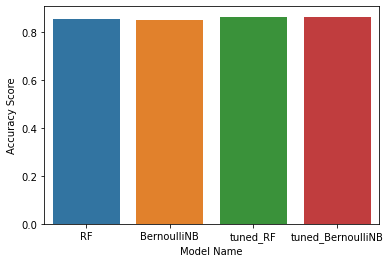

In [37]:
import seaborn as sns
sns.barplot(compare['Model Name'], compare['Accuracy Score'])

## Conclusion

### Reducing the number of features , we are still able to enhance the accuracy score ( though 1 percent),simultaneously, reducing calculation time for the machine.